In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = 40,10
plt.rcParams["font.size"] = 15

In [4]:
from one.utils import *
from one.data.ucrdata import UcrDataReader

In [5]:
ROOT_DIR = "./data/ucr/"
t = get_files_from_path("./data/ucr")

In [6]:
d = UcrDataReader()
test = d(ROOT_DIR+t[29])

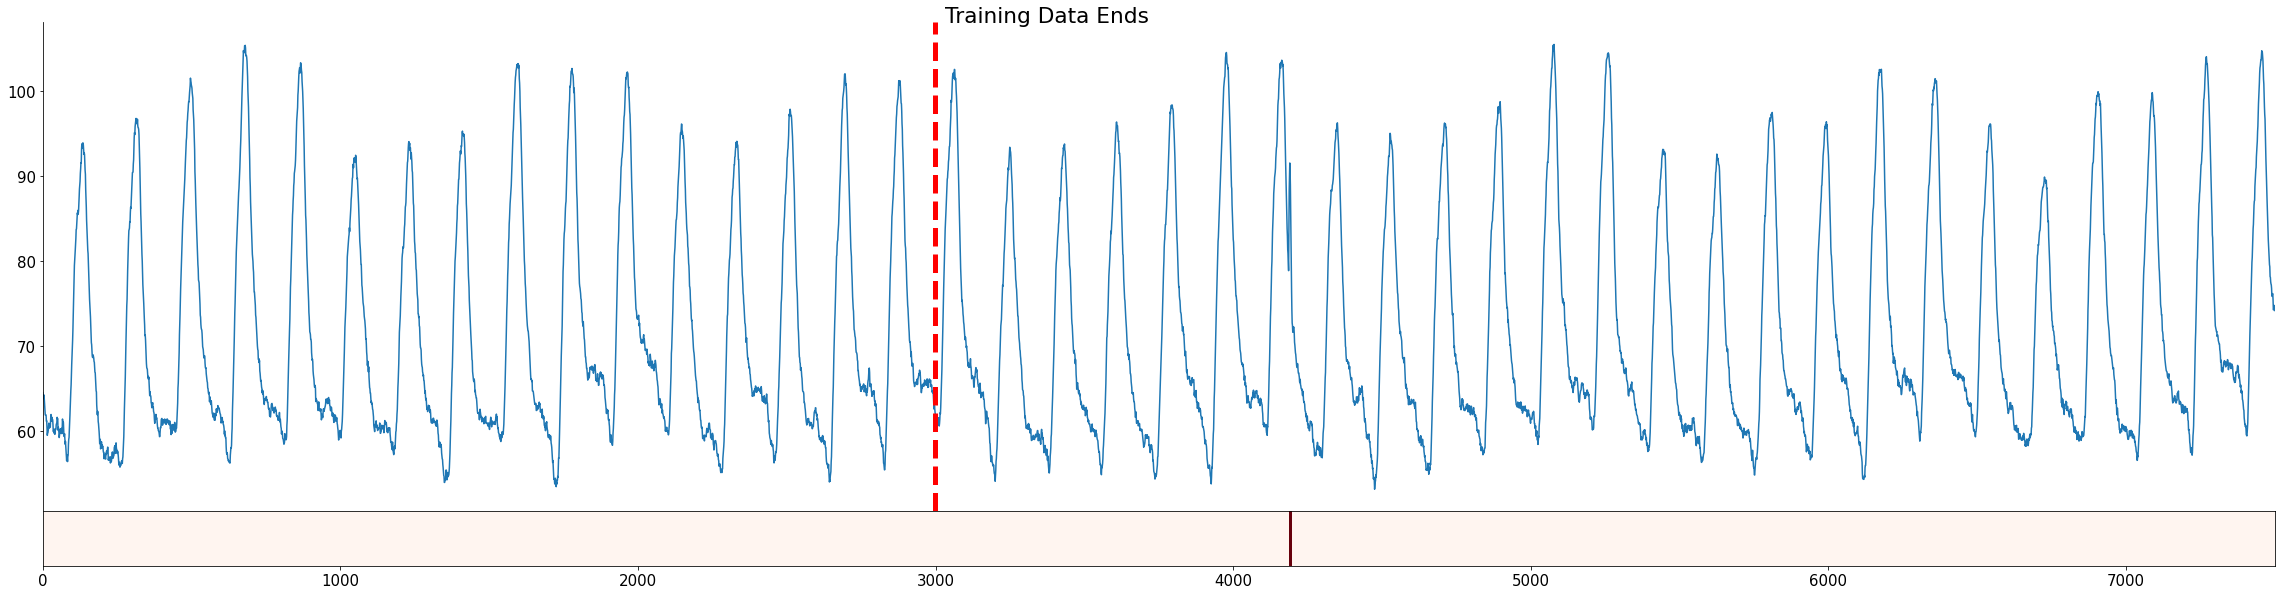

In [7]:
p = graph_data(test.series, test.labels, test.train_len)

In [ ]:
tr_data, tr_label = test.train

In [ ]:
from darts.models import TransformerModel
from darts.timeseries import TimeSeries
from numpy.lib.stride_tricks import sliding_window_view

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from rich.progress import track, Progress

In [5]:
from darts.datasets import *
from darts.dataprocessing.transformers import Scaler
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [ ]:
scaler = Scaler()

In [ ]:
w = 100
s = 1

series = TimeSeries.from_values(test.series)
series = scaler.fit_transform(series)
series = series.pd_series().to_numpy().astype(np.float32)

full = series[test.train_len-w:]
full_window = sliding_window_view(full, w)
full_window = full_window[::s]

preds = np.array([])

In [ ]:
from scipy.fft import fft, fftfreq

# fft to find cycles
yf = np.absolute(fft(series))
np.argmax(yf[int(test.train_len*0.01):int(test.train_len*0.5)]) + int(test.train_len*0.01)

In [ ]:
plt.plot(yf[100:])

In [ ]:
es = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0005,
    mode='min',
)


pl_trainer_kwargs={
  "accelerator": "gpu",
  "gpus": [0],
  "callbacks": [es]
}

model = TransformerModel(w,s, pl_trainer_kwargs=pl_trainer_kwargs)


t_s, v_s = series[:int(test.train_len*0.95)], series[int(test.train_len*0.05):]


model.fit(TimeSeries.from_values(t_s), 
          val_series = TimeSeries.from_values(v_s), 
          epochs=100,
          num_loader_workers=4)

In [ ]:
with Progress() as progress:
    
    task1 = progress.add_task("Generating Test Set...", total=len(test.test[0])/s)

    seq = []
    for idx, arr in enumerate(full_window.astype(np.float32)):
        ts = TimeSeries.from_values(arr)
        seq.append(ts)
                
        
        progress.update(task1, advance=1)

In [ ]:
p = model.predict(n=s, series=seq)

In [ ]:
for timestamp in p:
    preds = np.append(preds, timestamp.pd_series().to_numpy())


In [ ]:
len(p)

In [ ]:
preds.shape

In [ ]:
len(full_window)

In [ ]:
preds = preds[:len(test.test[0])]

In [ ]:
preds.shape

In [ ]:
anom = np.absolute(preds[:len(test.test[0])] - series[test.train_len:])

In [ ]:
anom.argmax()

In [ ]:
f, (a,b) = plt.subplots(nrows=2)
a.plot(anom)
b.plot(test.test[1])
#a.plot(test.test[0])

In [ ]:
f, (a,b) = plt.subplots(nrows=2)
a.plot(preds[:])
b.plot(series[test.train_len:])

In [ ]:
import seaborn as sns

sns.histplot(anom, bins=100)

In [8]:
w = 100
s = 1

In [9]:
tr_data, tr_label = test.train
test_data, test_label = test.get_test_with_window(w)

In [10]:
from one.models.predictive.nbeats import NBEATSModel

2022-05-19 11:31:40 prophet.plot ERROR: Importing plotly failed. Interactive plots will not work.


In [11]:
model = NBEATSModel(w, s, False)